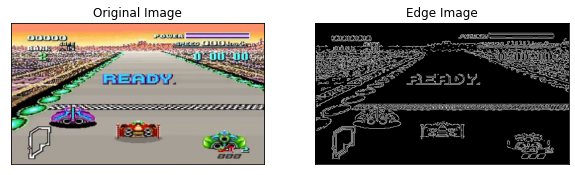

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('test_images/fzero.jpg')
edges = cv.Canny(img,400,500)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.savefig('test_images/fzero_edge.jpg')

In [2]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.2, 100)
output = img.copy()
# ensure at least some circles were found
if img is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv.circle(output, (x, y), r, (0, 255, 0), 4)
		cv.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
	cv.imshow("output", np.hstack([img, output]))
	cv.waitKey(0)

In [10]:

import cv2
import numpy as np

image = cv2.imread('test_images/fzero.jpg')
image = cv2.Canny(image,100,500)
  
# Set our filtering parameters
# Initialize parameter setting using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
  
# Set Area filtering parameters
params.filterByArea = True
params.minArea = 50
  
# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.3
  
# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.5
      
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01
  
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
      
# Detect blobs
keypoints = detector.detect(image)
  
# Draw blobs on our image as red circles
blank = np.zeros((1, 1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
  
# Show blobs
cv2.imshow("Filtering Circular Blobs Only", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
t2 = cv2.imread('test_images/fzero.jpg')
thresh = cv2.cvtColor(t2, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(thresh, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 101, 0)
count, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)
for i in range(1,count):
    t2 = cv2.circle(t2, (int(centroids[i,0]), int(centroids[i,1])), 5, (0, 255, 0, 0), 5)

cv2.imshow('circles', thresh)
cv2.imshow('centers', t2)
cv2.waitKey()

13

: 